In [ ]:
!pip install pennylane

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Definimos el tamaño del problema
numeroUsuarios = 10
numeroVoluntarios = 15
distancia = [[0 for i in range(numeroUsuarios)] for j in range(numeroVoluntarios)]
peticionUsuarios = np.random.randint(0, 2, numeroUsuarios)
peticionVoluntarios = np.random.randint(0, 2, numeroVoluntarios)
for i in range(0, numeroVoluntarios):
  for j in range(0, numeroUsuarios):
    distancia[i][j] = np.random.randint(5, 500)

In [ ]:
print(distancia)

[[132, 97], [314, 457], [187, 232]]


In [4]:
def matrizObjetivo():
  objetivo = [[0 for i in range(numeroVoluntarios)] for j in range(numeroVoluntarios)]
  for i in range(0, numeroVoluntarios):
    for j in range(0, numeroUsuarios):
      if i == j:
        objetivo[i][j] = distancia[i][j] * peticionVoluntarios[i] * peticionUsuarios[j] -(2 * peticionVoluntarios[i]) - (2 *  peticionUsuarios[j])
      else:
        objetivo[i][j] = 2
  return objetivo

In [5]:
dev = qml.device("default.qubit", wires = range(numeroVoluntarios))

In [6]:
def U_C(gamma, h, n):
  for i in range(n):
    qml.RZ(-2 * h[i][i] * gamma, wires = i)
    for j in range(n):
        if (j != i):
          qml.CNOT(wires = [i, j])
          qml.RZ(-2 * (-h[i][j] * h[i][j]) * gamma, wires = j)
          qml.CNOT(wires = [i, j])

In [7]:
def U_B(beta, n):
  for k in range(n):
    qml.RX(-2 * beta, wires = k)

In [8]:
@qml.qnode(dev)
def circuito(gamma, beta, h, n, capas):
  for k in range(n):
    qml.Hadamard(wires = k)
  for k in range(capas):
    U_C(gamma, h, n)
    U_B(beta, n)
  return qml.probs(wires = range(n))

In [9]:
gamma = 0.15
beta = 0.15
capas = 3

<BarContainer object of 32768 artists>

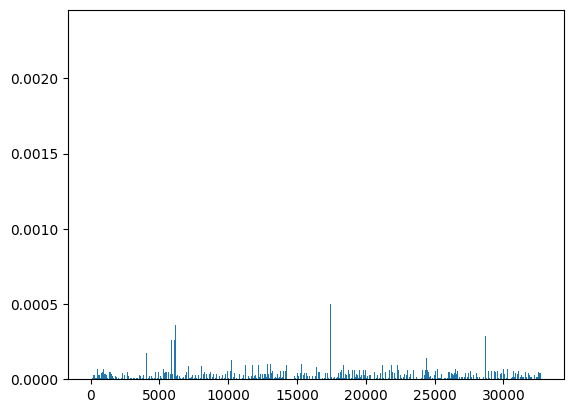

In [10]:
# @title
resultados = circuito(gamma, beta, matrizObjetivo(), numeroVoluntarios, capas)
plt.bar(range(2**numeroVoluntarios), resultados)